In [592]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [593]:
data = pd.read_csv('housing.csv')
# data = data.drop(columns=['ocean_proximity'])
data = pd.DataFrame(data)

In [594]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [595]:
data.dropna(inplace=True)

In [596]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [597]:
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [598]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [599]:
train_data = X_train.join(y_train)

In [600]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
13609,-117.27,34.14,36.0,3795.0,676.0,1742.0,585.0,4.1000,INLAND,96400.0
1015,-121.77,37.67,20.0,8068.0,1217.0,3489.0,1259.0,5.7907,INLAND,264200.0
3601,-118.49,34.23,32.0,4373.0,683.0,2040.0,693.0,5.2668,<1H OCEAN,242300.0
1336,-121.88,37.99,16.0,3787.0,515.0,1606.0,507.0,5.5676,INLAND,174200.0
7132,-118.12,34.03,20.0,2595.0,428.0,1751.0,479.0,5.6112,<1H OCEAN,308000.0
...,...,...,...,...,...,...,...,...,...,...
7556,-118.19,33.92,35.0,915.0,241.0,1153.0,252.0,3.3050,<1H OCEAN,115800.0
14580,-117.19,32.82,35.0,1074.0,180.0,442.0,173.0,5.2530,NEAR OCEAN,204000.0
4924,-118.24,34.00,23.0,588.0,157.0,716.0,173.0,1.2056,<1H OCEAN,87500.0
512,-122.23,37.82,52.0,3242.0,366.0,1001.0,352.0,12.2138,NEAR BAY,500001.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

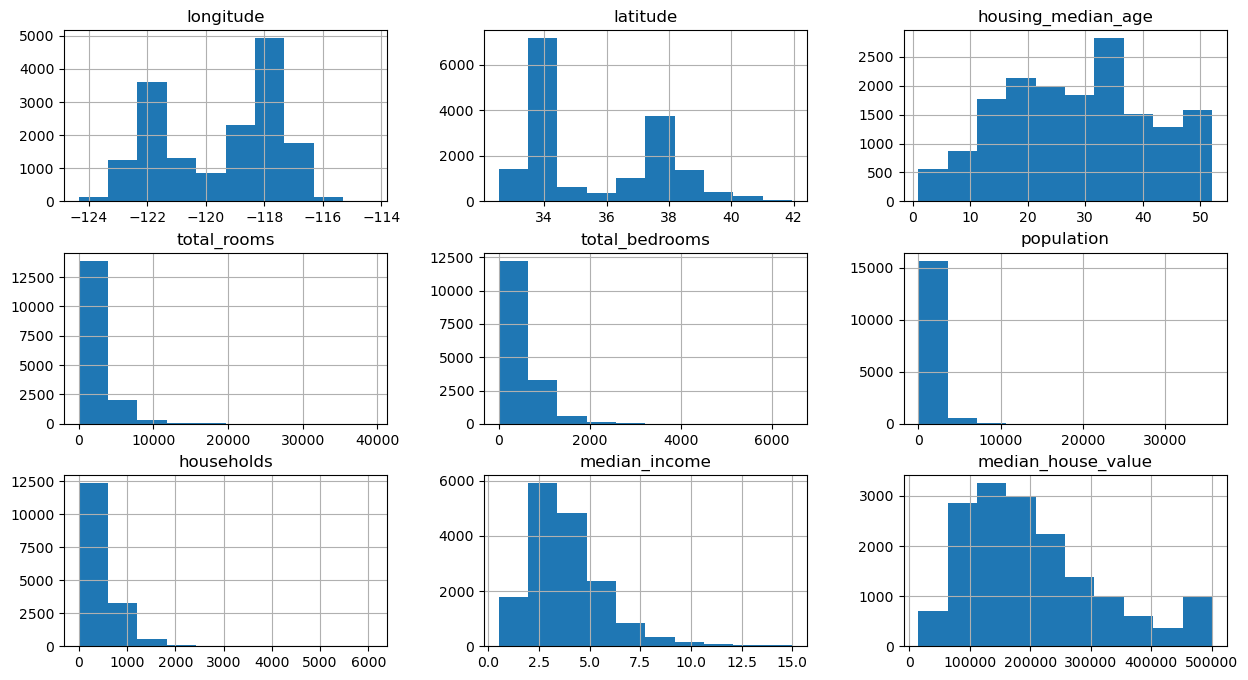

In [601]:
train_data.hist(figsize=(15,8))

In [602]:
train_data.corr(numeric_only=True)
# plt.figure(figsize=(25,18))
# sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924168,-0.117038,0.051207,0.076040,0.108063,0.062357,-0.019216,-0.050360
latitude,-0.924168,1.000000,0.018305,-0.041832,-0.073291,-0.115680,-0.077204,-0.075641,-0.139292
housing_median_age,-0.117038,0.018305,1.000000,-0.361756,-0.320947,-0.295152,-0.304110,-0.116168,0.109339
total_rooms,0.051207,-0.041832,-0.361756,1.000000,0.930204,0.854160,0.920002,0.196504,0.135581
total_bedrooms,0.076040,-0.073291,-0.320947,0.930204,1.000000,0.874674,0.980270,-0.009691,0.051805
population,0.108063,-0.115680,-0.295152,0.854160,0.874674,1.000000,0.904279,0.001329,-0.026409
households,0.062357,-0.077204,-0.304110,0.920002,0.980270,0.904279,1.000000,0.011642,0.066197
median_income,-0.019216,-0.075641,-0.116168,0.196504,-0.009691,0.001329,0.011642,1.000000,0.691074
median_house_value,-0.050360,-0.139292,0.109339,0.135581,0.051805,-0.026409,0.066197,0.691074,1.000000


In [603]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16346 entries, 13609 to 10466
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16346 non-null  float64
 1   latitude            16346 non-null  float64
 2   housing_median_age  16346 non-null  float64
 3   total_rooms         16346 non-null  float64
 4   total_bedrooms      16346 non-null  float64
 5   population          16346 non-null  float64
 6   households          16346 non-null  float64
 7   median_income       16346 non-null  float64
 8   ocean_proximity     16346 non-null  object 
 9   median_house_value  16346 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.9+ MB


<Axes: >

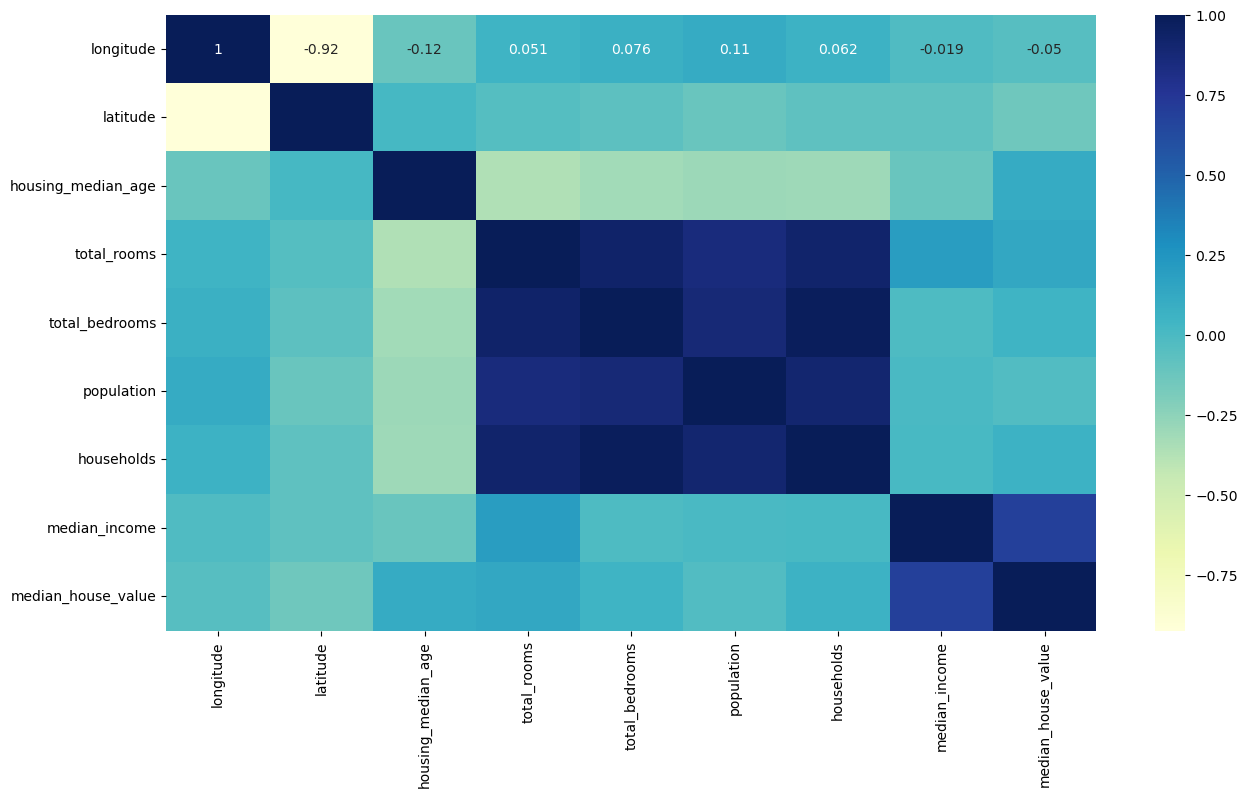

In [604]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap='YlGnBu')

In [605]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1) # +1 para prevenir valores de cero
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)


In [606]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

In [607]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
13609,-117.27,34.14,36.0,8.241703,6.517671,7.463363,6.373320,4.1000,96400.0,False,True,False,False,False
1015,-121.77,37.67,20.0,8.995785,7.104965,8.157657,7.138867,5.7907,264200.0,False,True,False,False,False
3601,-118.49,34.23,32.0,8.383433,6.527958,7.621195,6.542472,5.2668,242300.0,True,False,False,False,False
1336,-121.88,37.99,16.0,8.239593,6.246107,7.382124,6.230481,5.5676,174200.0,False,True,False,False,False
7132,-118.12,34.03,20.0,7.861727,6.061457,7.468513,6.173786,5.6112,308000.0,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,-118.19,33.92,35.0,6.820016,5.488938,7.050989,5.533389,3.3050,115800.0,True,False,False,False,False
14580,-117.19,32.82,35.0,6.980076,5.198497,6.093570,5.159055,5.2530,204000.0,False,False,False,False,True
4924,-118.24,34.00,23.0,6.378426,5.062595,6.575076,5.159055,1.2056,87500.0,True,False,False,False,False
512,-122.23,37.82,52.0,8.084254,5.905362,6.909753,5.866468,12.2138,500001.0,False,False,False,True,False


<Axes: >

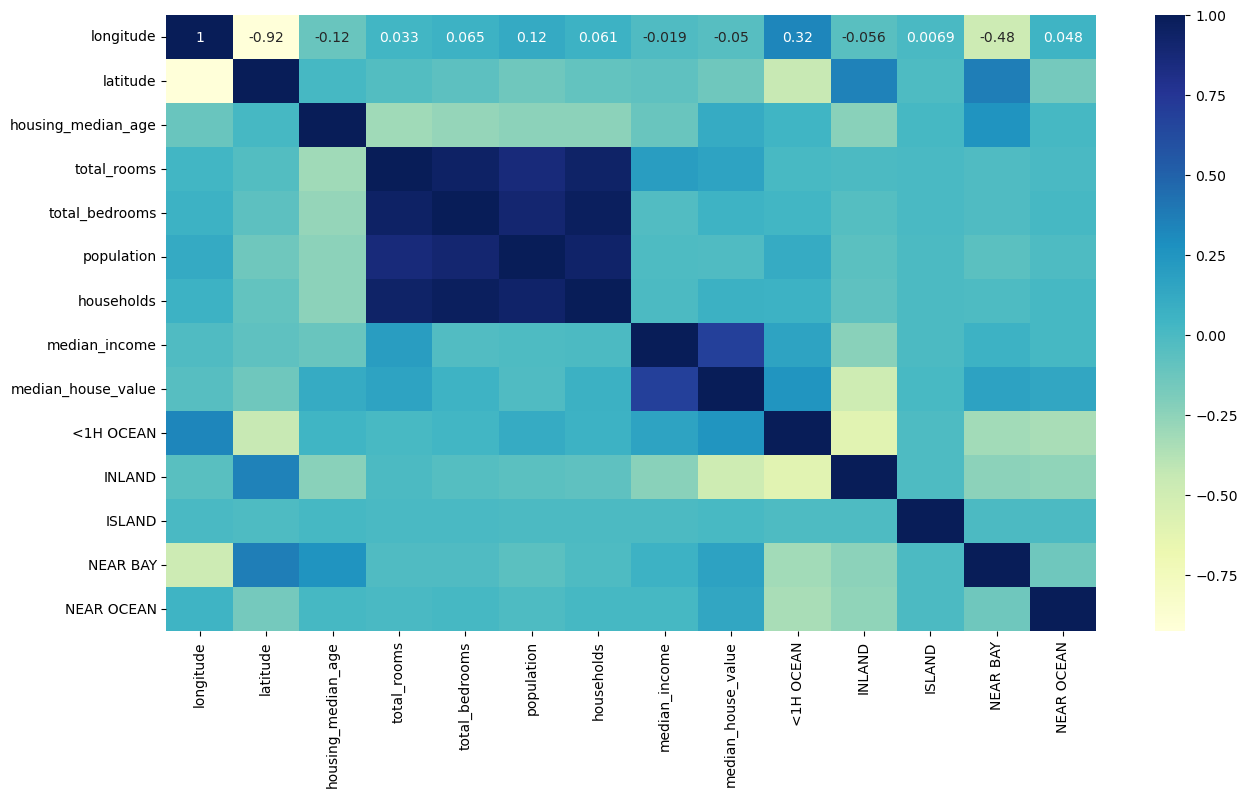

In [608]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap='YlGnBu')

<Axes: xlabel='latitude', ylabel='longitude'>

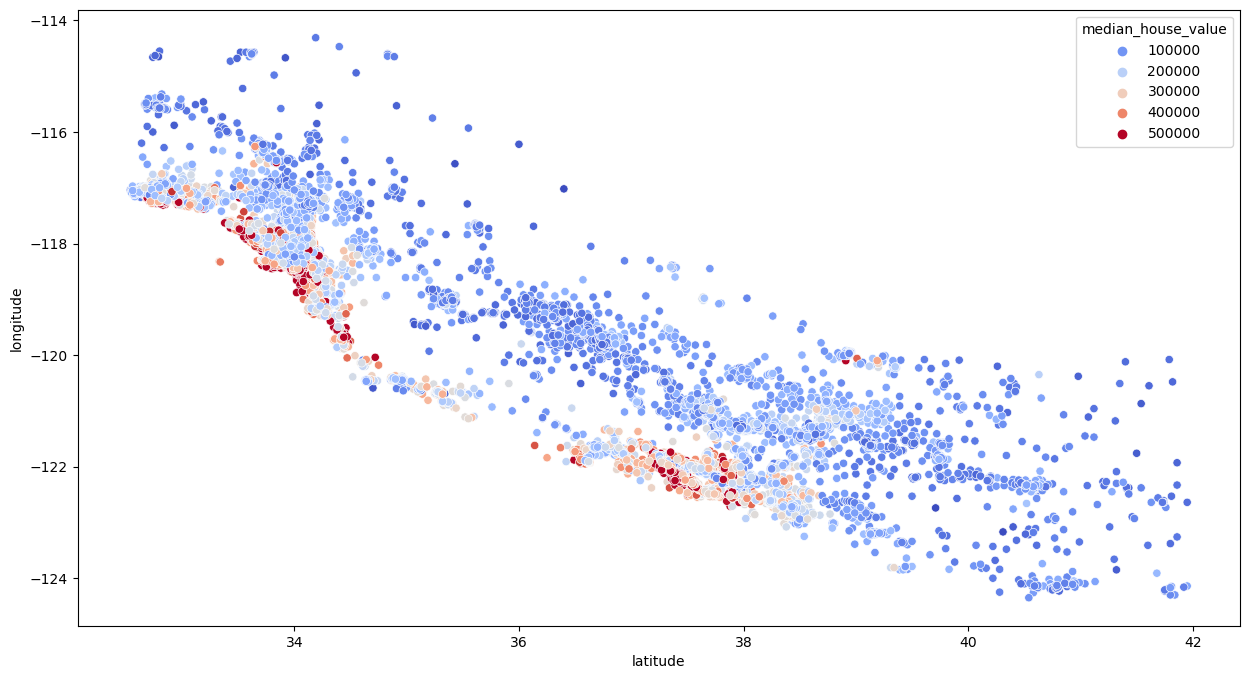

In [609]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue='median_house_value', palette='coolwarm')

In [610]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

<Axes: >

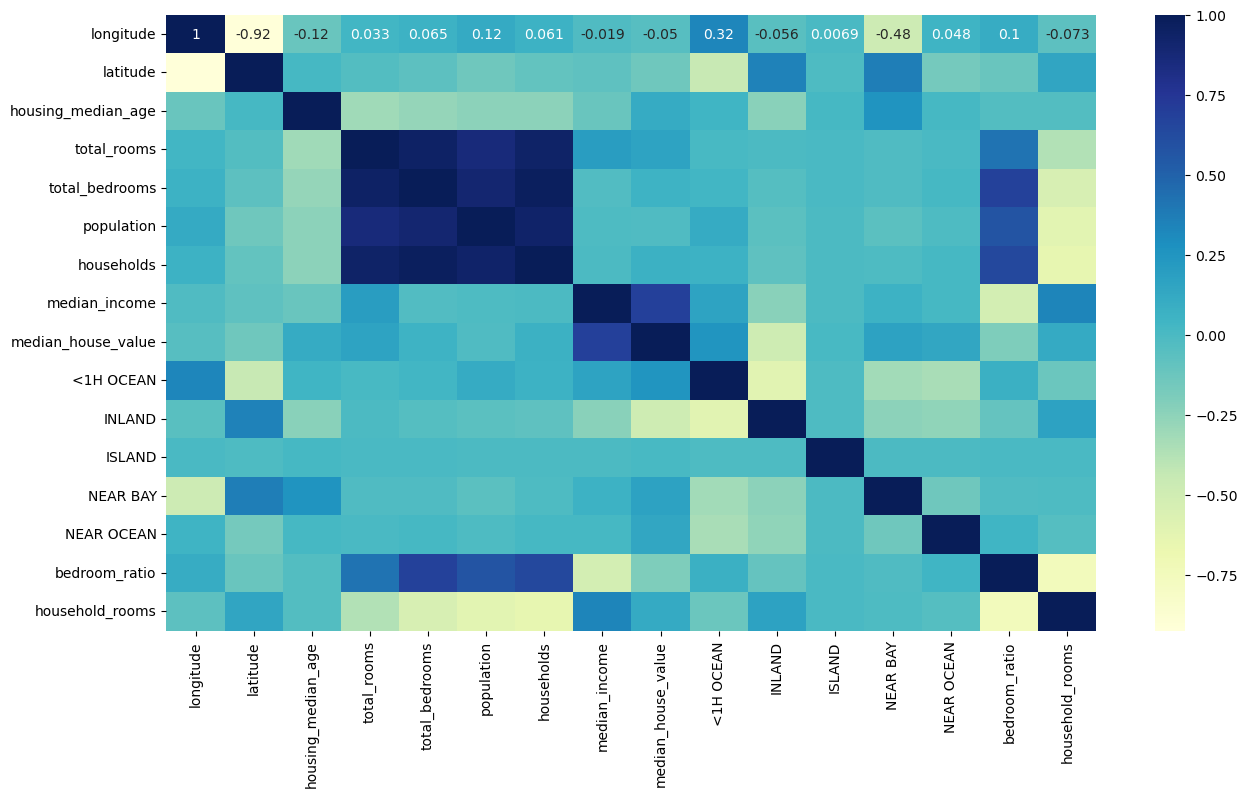

In [611]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap='YlGnBu')

In [612]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
X_train_s = scaler.fit_transform(X_train)

reg = LinearRegression()

reg.fit(X_train_s, y_train)

LinearRegression()

In [613]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1) # +1 para prevenir valores de cero
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']


In [614]:
X_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [615]:
X_test_s = scaler.transform(X_test)

In [616]:
reg.score(X_test_s, y_test)

0.6561671410371896

In [617]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

forest = RandomForestRegressor()

forest.fit(X_train_s, y_train)


RandomForestRegressor()

In [618]:
forest.score(X_test_s, y_test)

0.8128178036543877

In [619]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    "n_estimators":[100, 200, 300],
    "max_features":[2,4, 20],
    "min_samples_split":[2,4,6,8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5,
                           scoring="neg_mean_squared_error",
                           return_train_score=True
)

grid_search.fit(X_train_s, y_train)

KeyboardInterrupt: 

In [ ]:
grid_search.best_estimator_

In [ ]:
grid_search.best_estimator_.score(X_test_s, y_test)

0.8005445157888518